## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
from keras.utils.np_utils import to_categorical
import re
import time

from lib import tally, reorient

## Normal Import

In [2]:
# Normal
path = r"C:\Users\user\Jupyter Works\20220526_응바공세미나팀플\XrayBat-master\gen_normal\output"
list_dir = os.listdir(path)

fname = []
for idx in range(len(list_dir)):
    if list_dir[idx].endswith('.22'):
        fname.append(list_dir[idx])

print(len(fname))

2513


In [3]:
dimension = (200, 200, 1)

vol_norm = np.zeros((40, 120), dtype=np.float32)
for idx in range(len(fname)):
    image_3d = tally.usrbin(os.path.join(path, fname[idx]), dimension)
    image_2d = image_3d[:,:,0]
    image_2d = (image_2d / image_2d.max() * -1) + 1
    img_clean = reorient.reorient(image_2d)
    img_norm = reorient.normalize(img_clean)
    # for removing any batteries lying outside detector region.
    if img_norm.mean() < 0.8:
        vol_norm = np.dstack((vol_norm, img_norm))

vol_norm = np.swapaxes(vol_norm, axis1=2, axis2=1)
vol_norm = np.swapaxes(vol_norm, axis1=1, axis2=0)
vol_norm = vol_norm[1:]

vol_norm = np.expand_dims(vol_norm, axis=-1)
print(vol_norm.shape)

c:\Users\user\Jupyter Works\20220526_응바공세미나팀플\lib\reorient.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  angle_rad = np.arctan(sorted_eigenvectors[0, 0]/sorted_eigenvectors[0, 1])


(2483, 40, 120, 1)


1.0 0.0 0.44657928
True


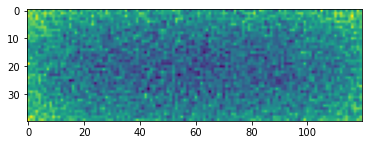

In [4]:
n = 908
plt.imshow(vol_norm[n])
print(vol_norm[n].max(), vol_norm[n].min(), vol_norm[n].mean())
if vol_norm[n].mean() < 0.8:
    print('True')
else:
    print('False') 

In [5]:
label0 = np.zeros((len(vol_norm)), dtype=np.int8)
label0 = to_categorical(label0, num_classes=3)
print(label0[0])

[1. 0. 0.]


## Hole Import

In [6]:
# Hole
path = r"C:\Users\user\Jupyter Works\20220526_응바공세미나팀플\XrayBat-master\gen_hole\output"
list_dir = os.listdir(path)
fname = []

for idx in range(len(list_dir)):
    if list_dir[idx].endswith('.22'):
        find_number = re.search('res(.*)_run', list_dir[idx])
        geo_name = 'res'+find_number.group(1)+'_geo_info.txt'
        with open(os.path.join(path, geo_name)) as f:
            lines = f.readlines()
        radius = float(lines[5][4:])
        depth = float(lines[6][4:])
        if radius > 0.3 and depth > 0.1:
            fname.append(list_dir[idx])

print(len(fname))

1062


In [7]:
dimension = (200, 200, 1)

vol_hole = np.zeros((len(fname), 40, 120), dtype=np.float32)
for idx in range(len(fname)):
    image_3d = tally.usrbin(os.path.join(path, fname[idx]), dimension)
    image_2d = image_3d[:,:,0]
    image_2d = (image_2d / image_2d.max() * -1) + 1
    img_clean = reorient.reorient(image_2d)
    img_norm = reorient.normalize(img_clean)
    vol_hole[idx] = img_norm

vol_hole = np.expand_dims(vol_hole, axis=-1)
print(vol_hole.shape)

(1062, 40, 120, 1)


1.0 0.0 0.7214354


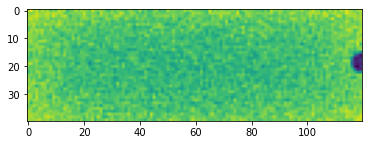

In [8]:
n = 100
plt.imshow(vol_hole[n])
print(vol_hole[n].max(), vol_hole[n].min(), vol_hole[n].mean())

In [9]:
label1 = np.zeros((len(vol_hole)), dtype=np.int8)
label1.fill(1)
label1 = to_categorical(label1, num_classes=3)
print(label1[0])

[0. 1. 0.]


## Impurities Import

In [10]:
# Hole
path = r"C:\Users\user\Jupyter Works\20220526_응바공세미나팀플\XrayBat-master\gen_impurity\output"
list_dir = os.listdir(path)

fname = []
for idx in range(len(list_dir)):
    if list_dir[idx].endswith('.22'):
        fname.append(list_dir[idx])

print(len(fname))

1401


In [11]:
dimension = (200, 200, 1)

vol_imp = np.zeros((len(fname), 40, 120), dtype=np.float32)
for idx in range(len(fname)):
    image_3d = tally.usrbin(os.path.join(path, fname[idx]), dimension)
    image_2d = image_3d[:,:,0]
    image_2d = (image_2d / image_2d.max() * -1) + 1
    img_clean = reorient.reorient(image_2d)
    img_norm = reorient.normalize(img_clean)
    vol_imp[idx] = img_norm

vol_imp = np.expand_dims(vol_imp, axis=-1)
print(vol_imp.shape)

(1401, 40, 120, 1)


1.0 0.0 0.23192887


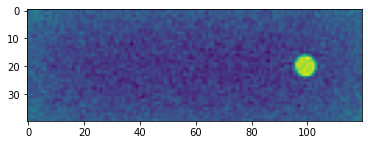

In [12]:
plt.imshow(vol_imp[200])
print(vol_imp.max(), vol_imp.min(), vol_imp.mean())

In [13]:
label2 = np.zeros((len(fname)), dtype=np.int8)
label2.fill(2)
label2 = to_categorical(label2, num_classes=3)
print(label2[0])

[0. 0. 1.]


In [14]:
labels = np.zeros((len(label0)+len(label1)+len(label2), 3), dtype=np.uint8)
labels[:len(label0), :] = label0
labels[len(label0):len(label0)+len(label1), :] = label1
labels[len(label0)+len(label1):len(label0)+len(label1)+len(label2), :] = label2
print(labels.shape)

(4946, 3)


In [15]:
labels = np.expand_dims(labels, axis=1)
print(labels.shape)

(4946, 1, 3)


In [16]:
vol = np.zeros((len(vol_norm)+len(vol_hole)+len(vol_imp), 40, 120, 1), dtype=np.float32)
vol[:len(vol_norm), :, :] = vol_norm
vol[len(vol_norm):len(vol_norm)+len(vol_hole), :, :] = vol_hole
vol[len(vol_norm)+len(vol_hole):len(vol_norm)+len(vol_hole)+len(vol_imp), :, :] = vol_imp

In [17]:
vol = np.expand_dims(vol, axis=1)
print(vol.shape)

(4946, 1, 40, 120, 1)


In [18]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_val, Y_train, Y_val = train_test_split(vol, labels, test_size = 0.1, random_state=2)

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat(None)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).repeat(1)

In [20]:
print(type(train_dataset.take(1)))

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>


(1, 40, 120, 1)
(1, 3)


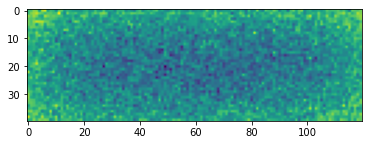

In [21]:
for image, label in train_dataset:
    print(image.shape)
    print(label.shape)
    plt.imshow(image[0, :, :, 0])
    break



In [22]:
# print(X_train.take(1))
# plt.imshow(X_train.take(1).numpy())

In [23]:
# test = tf.convert_to_tensor(X_train, dtype=tf.float32)
# test = tf.data.Dataset.from_tensor_slices(test).repeat()

In [24]:
# Some examples
# number = 500
# plt.imshow(X_train[number][:,:,0],cmap='gray')
# print(Y_train[number])
# print(np.max(X_train[number][:,:,0]), np.min(X_train[number][:,:,0]), np.mean(X_train[number][:,:,0]))

In [25]:
# test = X_train[number][:, :, 0] > 0.5
# plt.imshow(test)

In [26]:
# print(np.sum(test))

In [27]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Add, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential([
    Conv2D(filters=128, kernel_size=(3,3), padding='same', 
           activation='relu', input_shape = (40, 120, 1)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', 
           activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=(3,3), padding='same', 
           activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16, kernel_size=(3,3), 
           padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation = "softmax")
])

'''
def resnet(num_filters=64, num_res_blocks=16):
    x_in = Input(shape=(40, 120, 1))

    x = b = Conv2D(num_filters, 3, padding='same')(x_in)
    for i in range(num_res_blocks):
        b = res_block(b, num_filters)
    b = Conv2D(num_filters, 3, padding='same')(b)
    x = Add()([x, b])
    x = Conv2D(1, 3, padding='same')(x)
    
    x = MaxPool2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(3, activation='softmax')(x)

    return Model(inputs=x_in, outputs=x, name="resnet")

def res_block(x_in, num_filters):
    """Creates a residual block."""
    x = Conv2D(num_filters, 3, padding='same', activation='relu')(x_in)
    x = Conv2D(num_filters, 3, padding='same')(x)
    x = Add()([x_in, x])
    return x

model = resnet(num_filters=64, num_res_blocks=16)
'''

'\ndef resnet(num_filters=64, num_res_blocks=16):\n    x_in = Input(shape=(40, 120, 1))\n\n    x = b = Conv2D(num_filters, 3, padding=\'same\')(x_in)\n    for i in range(num_res_blocks):\n        b = res_block(b, num_filters)\n    b = Conv2D(num_filters, 3, padding=\'same\')(b)\n    x = Add()([x, b])\n    x = Conv2D(1, 3, padding=\'same\')(x)\n    \n    x = MaxPool2D(pool_size=(2,2))(x)\n    x = Flatten()(x)\n    x = Dense(128, activation=\'relu\')(x)\n    x = Dense(3, activation=\'softmax\')(x)\n\n    return Model(inputs=x_in, outputs=x, name="resnet")\n\ndef res_block(x_in, num_filters):\n    """Creates a residual block."""\n    x = Conv2D(num_filters, 3, padding=\'same\', activation=\'relu\')(x_in)\n    x = Conv2D(num_filters, 3, padding=\'same\')(x)\n    x = Add()([x_in, x])\n    return x\n\nmodel = resnet(num_filters=64, num_res_blocks=16)\n'

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss', patience=200, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 120, 128)      1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 60, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 60, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 30, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 15, 32)        0

In [29]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

c:\Users\user\.conda\envs\tf-env\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [30]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [31]:
epochs = 200  # for better result increase the epochs
batch_size = 100

In [32]:
# Fit the model

history = model.fit(train_dataset,
                    batch_size=batch_size,
                    epochs = epochs,
                    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
                    validation_data = valid_dataset, 
                    steps_per_epoch = 1000)


Epoch 1/200
1000/1000 [==============================] - 8s 5ms/step - loss: 0.5245 - accuracy: 0.8080 - val_loss: 0.4010 - val_accuracy: 0.7939 - lr: 0.0010
Epoch 2/200
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2451 - accuracy: 0.9330 - val_loss: 0.1976 - val_accuracy: 0.9535 - lr: 0.0010
Epoch 3/200
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2158 - accuracy: 0.9340 - val_loss: 0.2059 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 4/200
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2201 - accuracy: 0.9450 - val_loss: 0.2284 - val_accuracy: 0.9596 - lr: 0.0010
Epoch 5/200
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1806 - accuracy: 0.9520 - val_loss: 0.1818 - val_accuracy: 0.9455 - lr: 0.0010
Epoch 6/200
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1741 - accuracy: 0.9590 - val_loss: 0.2032 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 7/200
1000/1000 [=============================

In [33]:
# Create directory for saving model weights
weights_dir = 'weights'
os.makedirs(weights_dir, exist_ok=True)
named_tuple = time.localtime() # get struct_time
time_string = time.strftime("%Y%m%d_%H%M", named_tuple)

model.save_weights(os.path.join(weights_dir, f'weights-{epochs}epochs-{time_string}.h5'))

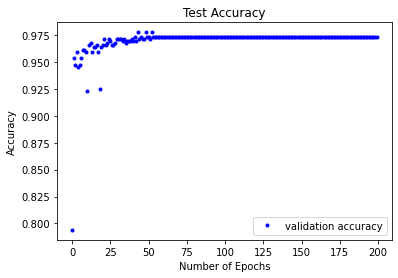

In [34]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_accuracy'], 'b.', label="validation accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(1, 40, 120, 1)
['[0.9759 0.0033 0.0208]']


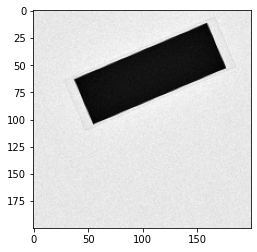

In [35]:
path = r"C:\Users\user\Jupyter Works\20220526_응바공세미나팀플\XrayBat-master\gen_hole\output"
fname = 'res27_run001_fort.22'

image_3d = tally.usrbin(os.path.join(path, fname), dimension)
image_2d = image_3d[:,:,0]
image_2d = (image_2d / image_2d.max() * -1) + 1
img_clean = reorient.reorient(image_2d)
img_norm = reorient.normalize(img_clean)
vol = img_norm

vol = np.expand_dims(vol, axis=-1)
vol = np.expand_dims(vol, axis=0)

plt.imshow(image_3d[:,:,0], cmap='gray')
print(vol.shape)
result = model.predict(vol)
x = list(map(lambda result :str(result), result.round(4)))
print(x)

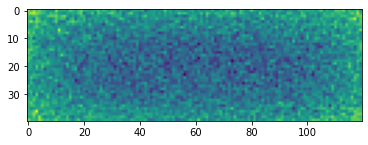

In [36]:
plt.imshow(img_norm)